# K-Means Clustering

## Einsetzung des k-Means-Algorithmus zur Farbenerkennung

In [1]:
# Die benötigten Pakete importieren
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Eine Funktion erstellen, um die vorherrschende Farben für die Datensätze zu finden
# Sowohl für die sowjetischen als auch für die nordkoreanischen Bilder
def create_palette(image_folder, k):
    pixels = []
    images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('jpg', 'jpeg', 'png'))]

    for image in images:
        path = os.path.join(image_folder, image)
        img = Image.open(path).convert("RGB")
        img = img.resize((100, 100))
        
        data = np.array(img)
        pix = data.reshape(-1,3)
        pixels.extend(pix)

    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(pixels)
    colours = kmeans.cluster_centers_.astype(int)

    return colours

In [3]:
# Funktion, um die Farben zu visualisieren
def visualise_colour_palette(colours, dataset):
    plt.figure(figsize=(8, 2))
    plt.title(dataset, fontsize=12)
    plt.axis("off")
    plt.imshow([colours])
    plt.show()

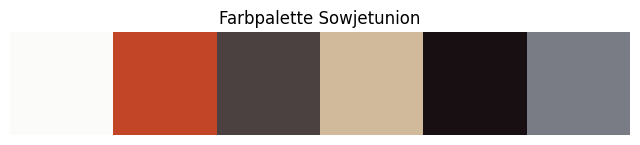

In [4]:
# Datensatz: Sowjetunion
images_USSR = '/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/Sowjetunion'
colours_USSR = create_palette(images_USSR, k=6)
visualise_colour_palette(colours_USSR, dataset="Farbpalette Sowjetunion")

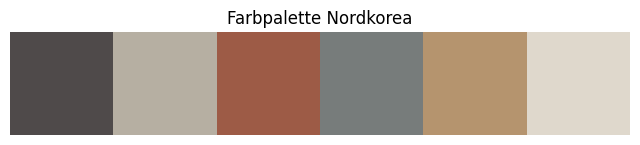

In [5]:
# Datensatz: Nordkorea
images_DPRK = '/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/Nordkorea'
colours_DPRK = create_palette(images_DPRK, k=6)
visualise_colour_palette(colours_DPRK, dataset="Farbpalette Nordkorea")